# 0 First things first!

The copy of this notebook in the `shared` folder is *read only*.  So, your first task is to make your own copy of this notebook that you can work in.  Follow these steps:

* Go to the toolbar at the top of this page and click on `File`
* Now click on `Save as...`
* The `Save as` dialogue box should now be open.  CLEAR OUT the notebook path box (which says `shared/`) and replace it with `L 01.ipynb`.
* Click on the blue box labeled `Save` 

Now you will be working in a copy of the original notebook in your main JupyterHub directory (ie not in the `/shared` folder). 

# 1 Introduction

Recall that this investigation of New York City emergency room data was prompted by this tweet back in March of 2020.

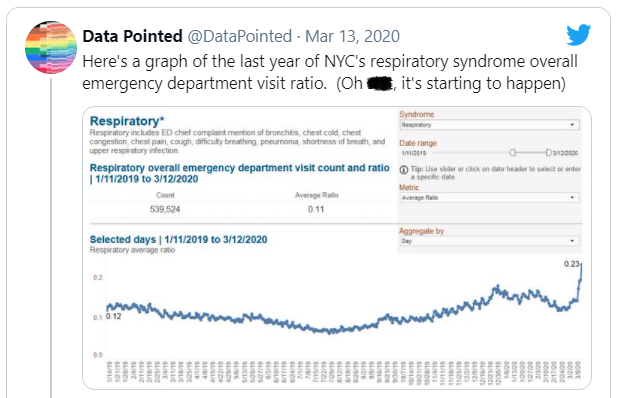

This notebook is fairly verbose bc i'm trying to explain each step to you.  In the future, these topics will be more streamlined but I'll be verbose with respect to new material.

# 2 Imports

In this activity, we are only going to need to import the `pandas` and `altair` libraries.

`import pandas as pd` means:
* we are importing the whole `pandas` library
* we are giving `pandas` the alias `pd`, so that when we call a function from `pandas` we only need to prefix `pd` rather than `pandas`.  This is the standard alias for `pandas`
* ditto for `altair` and `alt`

In [ ]:
import pandas as pd
import altair as alt

Note that when this runs successfully, we don't get an output cell.  Only the execution number  in the `[ ]` updates.

# 3 The data

## 3.1 Read in the data

We're going to use the `pandas` function `read_csv` to get the data from the `raw` URL in my github repo.  Remember that instead of typing `pandas` I just type `pd` because of the alias created in the `import` statement.  

This will read the data into a dataframe named `nyc_er`.  

In [ ]:
nyc_er = pd.read_csv("https://raw.githubusercontent.com/sawula/Survey-of-Python-data-science-stack/gh-pages/NYC%20ER%20respire%2016%2020%20totals.csv")

## 3.2 Examine the data

### 3.2.1 `type()`

We can check to see what kind of object `nyc_er` is using `type()`.

In [ ]:
type(nyc_er)

It's a pandas dataframe!

### 3.2.2 `head()`, `tail()`

We can peek at the first five lines or last five lines of the DataFrame using the `head()` or `tail()` methods.  You can use these with any Pandas dataframe.

If you pass *a number* in the parentheses, you display *that number* of lines.

In [ ]:
nyc_er.head()  #the default number of lines to display is 5

In [ ]:
nyc_er.tail(3)  # this displays the last 3 lines

You can also just type the name of the dataframe.  Normally this gives you an abbreviated listing, basically `head()` and `tail()` with ellipses in between, but this dataframe has so few rows that Pandas just lists them all.

In [ ]:
nyc_er

### 3.2.3 `columns`

Here's how you list the names of the columns in the dataframe:

In [ ]:
nyc_er.columns

You may have noticed that we typed `.columns` rather than `.columns()`.  This is because the command calls for an *attribute* rather than a *method* of the dataframe.  An attribute is something that is an essential part of every dataframe.

You can see a list of attributes and methods [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). I wouldn't get hung up on these right now.

### 3.2.4 `dtypes`

One of the attributes is `dtypes` which reports the data type `read_csv` assigned to each column.  You can see what the possibilities are [here](https://pbpython.com/pandas_dtypes.html). 

In [ ]:
nyc_er.dtypes

 You can see that our simple `read_csv()` failed to recognize the `date` column as a date.  (This is going to be inconvenient later.) 

Let's change the type of `date` using the `.astype()` method. Again, this is a *method* of a Pandas `dataframe` object.

In [ ]:
nyc_er = nyc_er.astype({'date':'datetime64'})  # Yes, you need the braces and the parentheses!

Since we're not changing the `dtype` of `count`, we don't need to mention it in the command. 

Let's check that this casting of data into these new types worked.

In [ ]:
nyc_er.dtypes

For now, let's set aside a discussion of why you should care about `dtypes`.  I normally would skip this on a first assignment, but we need to correct the `date` column in order to graph.  

I'm sure it's generally good practice to make sure that the data types are correct, but I'm often sloppy about this!

# 4 Plotting total number of cases by month

We're going to plot data using the charting library `Altair` which we imported above.  I'll walk you through these graphs. 

* In Altair, the principal object is a `Chart`.  You may recall that we imported Altair with an alias of `alt`, so to create a chart we will type `alt.Chart()` and type inside the parentheses the name of the Pandas dataframe we're plotting.
* In this case, we include `width=800` to make the chart 800 pixels wide.  That's an optional argument.
*Next we're goint to specify what sort of marks to use in our graph.  Some options are `mark_line()`, `mark_point()`, `mark_circle()`, and `mark_bar()`. You can see the full list [here](https://altair-viz.github.io/user_guide/marks.html).
* Next we specify how we are going to associate information from the dataset in different "channels" in the graph.  If plotting points, what information is going to determine the x- and y- coordinates?  What is going to determine the size of the point?  Its color?  A list of encoding channels is given [here](https://altair-viz.github.io/user_guide/encoding.html#encoding-channels).
* We usually want to tell Altair what *type* of data each column represents.  This is like the `dtype` information above.  The options for types are given [here](https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types).
With this information, I think you can follow the specification of the graph below.  

In [ ]:
alt.Chart(nyc_er,width=800).mark_line().encode(x="date:T", y="count:Q")

Check out what happens when you change `mark_line()` to some other kind of mark, like `mark_circle()`?

If you want a more complete example of graphing in Altair, you may find [this example](https://altair-viz.github.io/case_studies/exploring-weather.html) in the Altair documentation helpful. 

# 5 Visualizing periodicity

The previous graph looks *periodic*.  Maybe not as perfectly as a trigonometric function, but from year to year there seems to be a regular peak in January.  Let's see if we can display this to make it easier to see.

One idea is to plot the years against each other, with each line running from January to December.  Altair lets us do this with built-in `month()` and `year()` functions which operate on dates.

I think the Altair graph specification should be easy for you to follow.  I split up the `Chart()` command over several lines using `\`.  It indicates that the statement continues on the next line.  Python also guesses that the line continues when ending with a comma.

In [ ]:
alt.Chart(nyc_er,width=600) \
            .mark_line() \
            .encode(x='month(date):T',
                    y='count:Q',
                    color='year(date):N')

What do you notice in this graph?

# 6 Quick recap

In terms of our journey through our Python data science stack, we looked at two libraries:  Pandas and Altair.

In Pandas, the main object is a DataFrame.  We used the methods: 
* `head()`
* `tail()`
* `astype()`

and the attributes:
* `columns`
* `dtypes`

as well as `[]` for selecting parts of the data.

In Altair, the main object is a Chart.  We used the methods:
* `mark_line()`
* `encode()`

We also used the Python command `type()` to double-check the types of objects we had created.

Look at that.  You're starting to be able to read code!


# 7 Your turn

* Save your work in this notebook by typing `CTL` `S` 
* Take a quick Canvas quiz on some of this code
* In the next notebook, you create similar graphs for another (related) dataset.  See Canvas for that link.